In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

In [2]:
# Import charging output file from SUMO
df_output = pd.read_csv('charging_output.csv', delimiter=";")
df_output

C:\Users\joey_\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,step,charging_station,status,EV,watt_charged,current_battery,max_battery
0,0,hh1_ev1_homecs,not charging,NaN,NaN,NaN,NaN
1,0,hh1_ev3_homecs,not charging,NaN,NaN,NaN,NaN
2,0,hh1_ev4_homecs,not charging,NaN,NaN,NaN,NaN
3,0,hh1_ev5_homecs,not charging,NaN,NaN,NaN,NaN
4,0,hh1_ev7_homecs,not charging,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
202850,86400,hh16_ev132_public,not charging,NaN,NaN,NaN,NaN
202851,86400,hh16_ev133_public,not charging,NaN,NaN,NaN,NaN
202852,86400,hh16_ev134_public,not charging,NaN,NaN,NaN,NaN
202853,86400,hh16_ev135_public,not charging,NaN,NaN,NaN,NaN


## Home

In [3]:
# The same process as in profile_home
df = df_output
df_home = df.loc[df['charging_station'].str.contains("homecs")]


df_home2 = df.loc[df['status'] == "charging"]
df_home2 = df_home2.loc[df_home2['charging_station'].str.contains("homecs")]

df_home3 = df.loc[df['status'] == "not charging"]
df_home3 = df_home3.loc[df_home3['charging_station'].str.contains("homecs")]

df_home3 = df_home3.groupby(['step']).size().reset_index(name="count")
df_home2 = df_home2.groupby(['step']).size().reset_index(name="count")
df_home = df_home.groupby(['step']).size().reset_index(name="count")
df_home['charging'] = df_home['count'] - df_home3['count']
df_home['charging'] = df_home['charging'] * 7


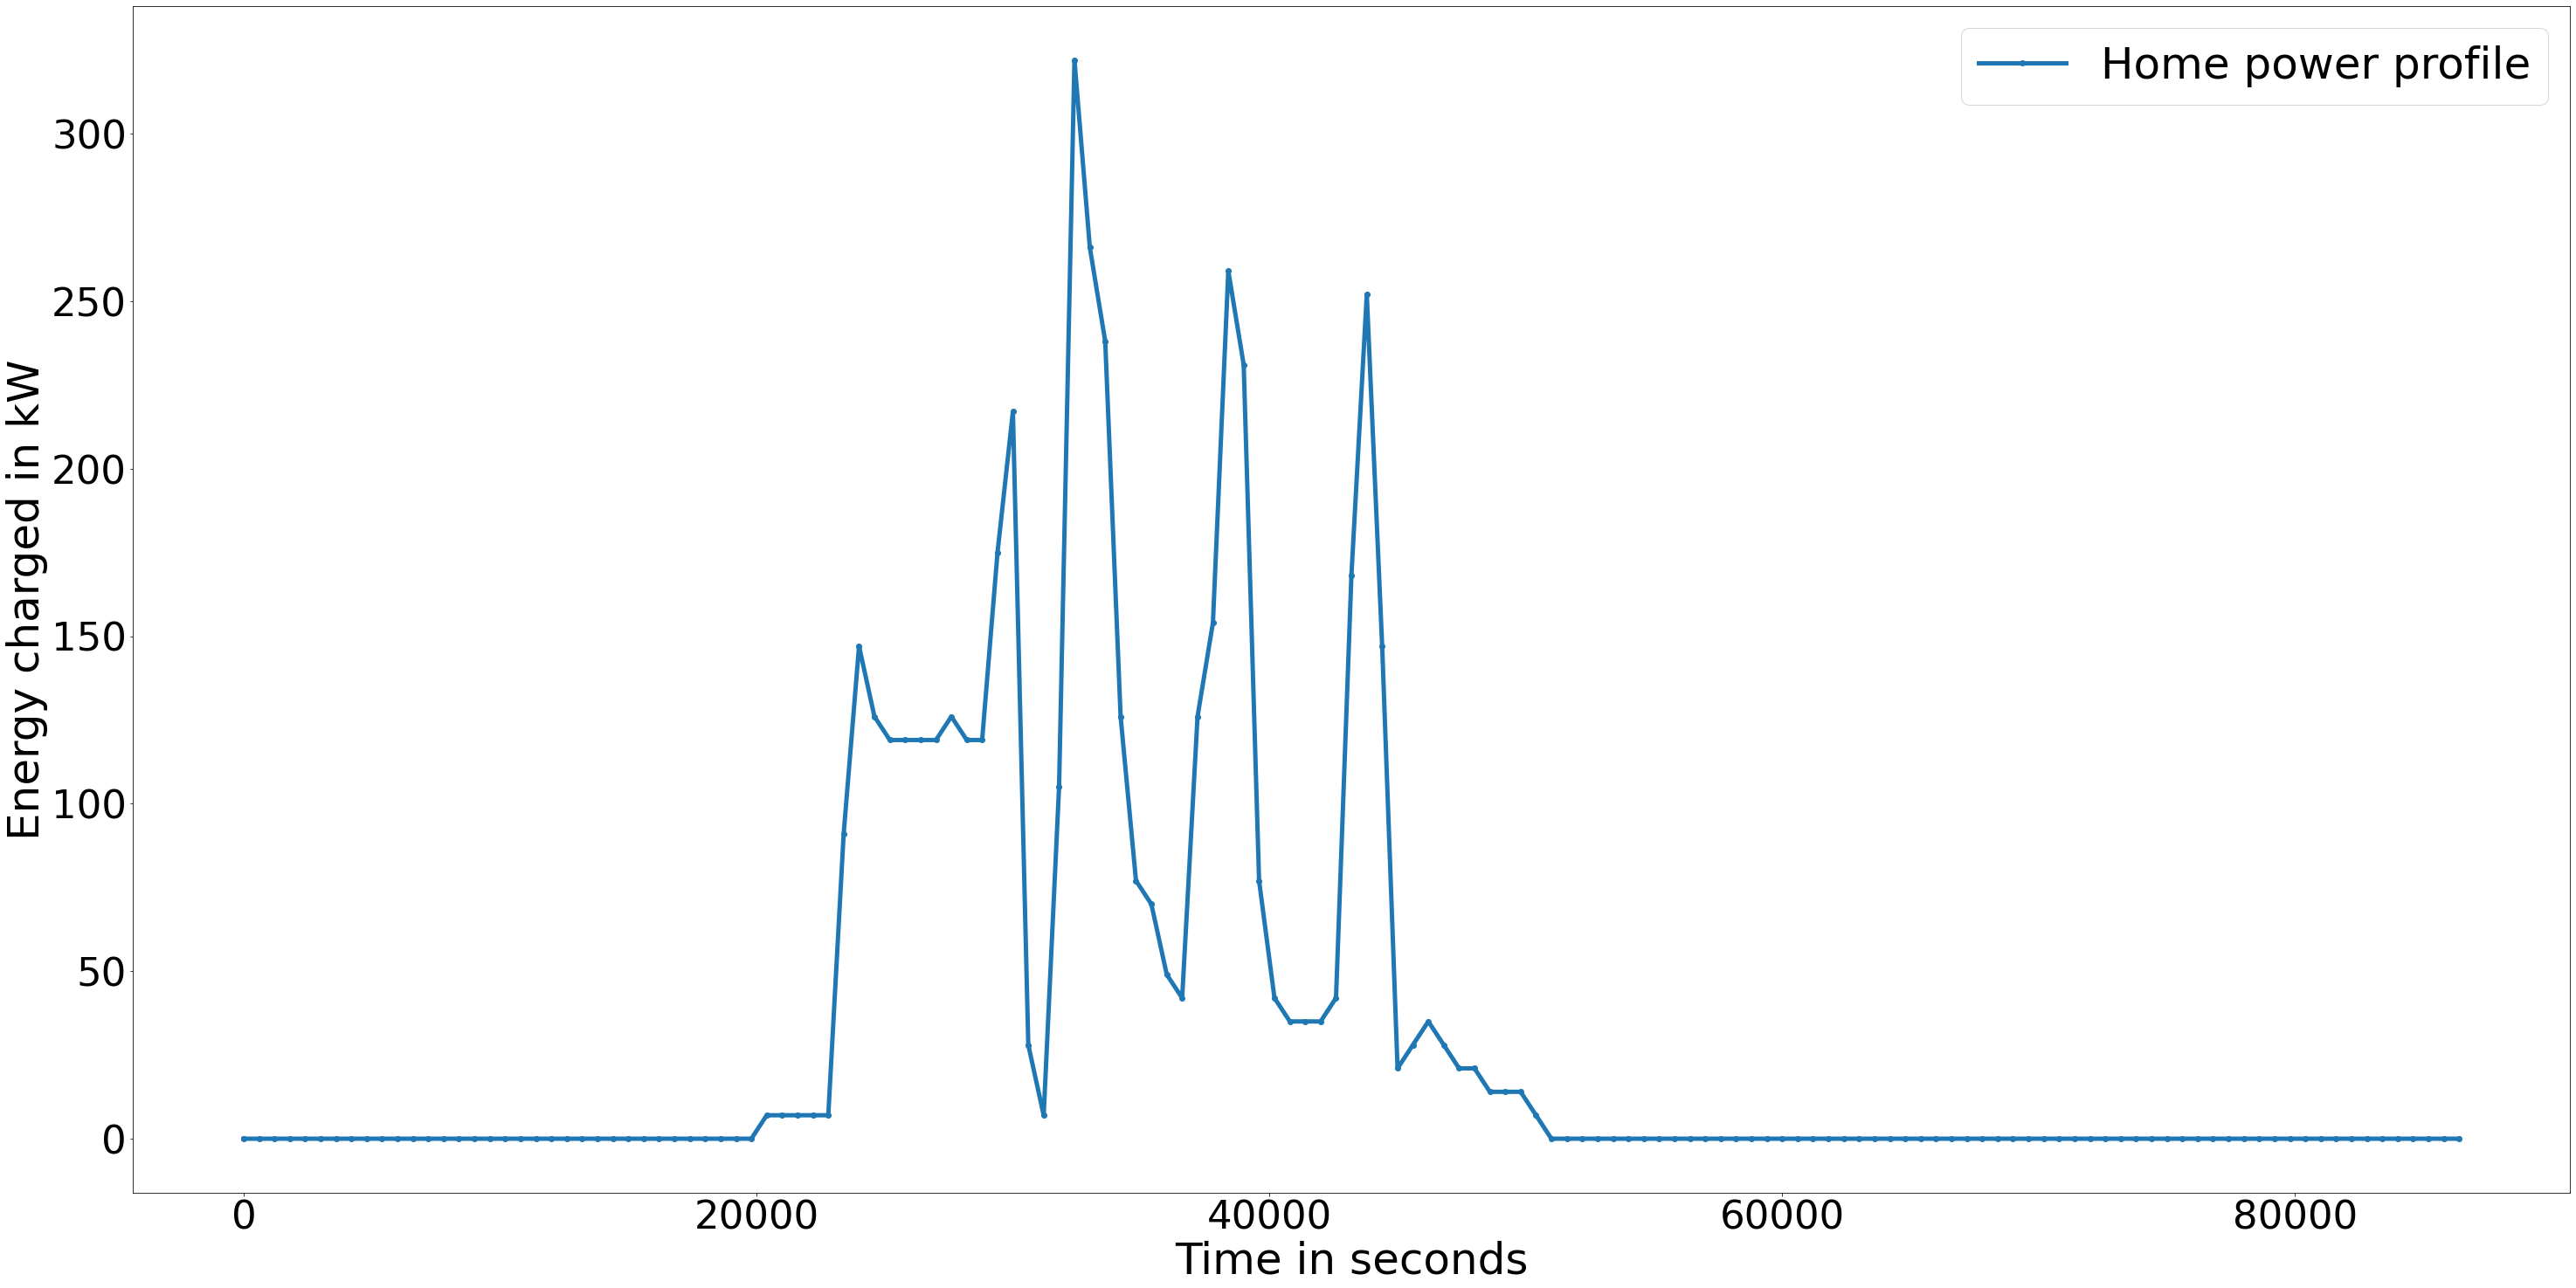

In [4]:
df_home.plot(x ='step', y='charging', kind = 'line', lw = 5, figsize=(50,25), fontsize=45, style='o-')
plt.legend(['Home power profile'], fontsize=50)
plt.xlabel('Time in seconds', fontsize=50)
plt.ylabel('Energy charged in kW', fontsize=50)
plt.show()

## Work

In [5]:
# The same process as in profile_work
df = df_output
df_work = df.loc[df['charging_station'].str.contains("work")]
df_work2 = df.loc[df['status'] == "charging"]
df_work2 = df_work2.loc[df_work2['charging_station'].str.contains("work")]
df_work3 = df.loc[df['status'] == "not charging"]
df_work3 = df_work3.loc[df_work3['charging_station'].str.contains("work")]
df_work3 = df_work3.groupby(['step']).size().reset_index(name="count")
df_work2 = df_work2.groupby(['step']).size().reset_index(name="count")
df_work = df_work.groupby(['step']).size().reset_index(name="count")
df_work['charging'] = df_work['count'] - df_work3['count']
df_work['charging'] = df_work['charging'] * 7

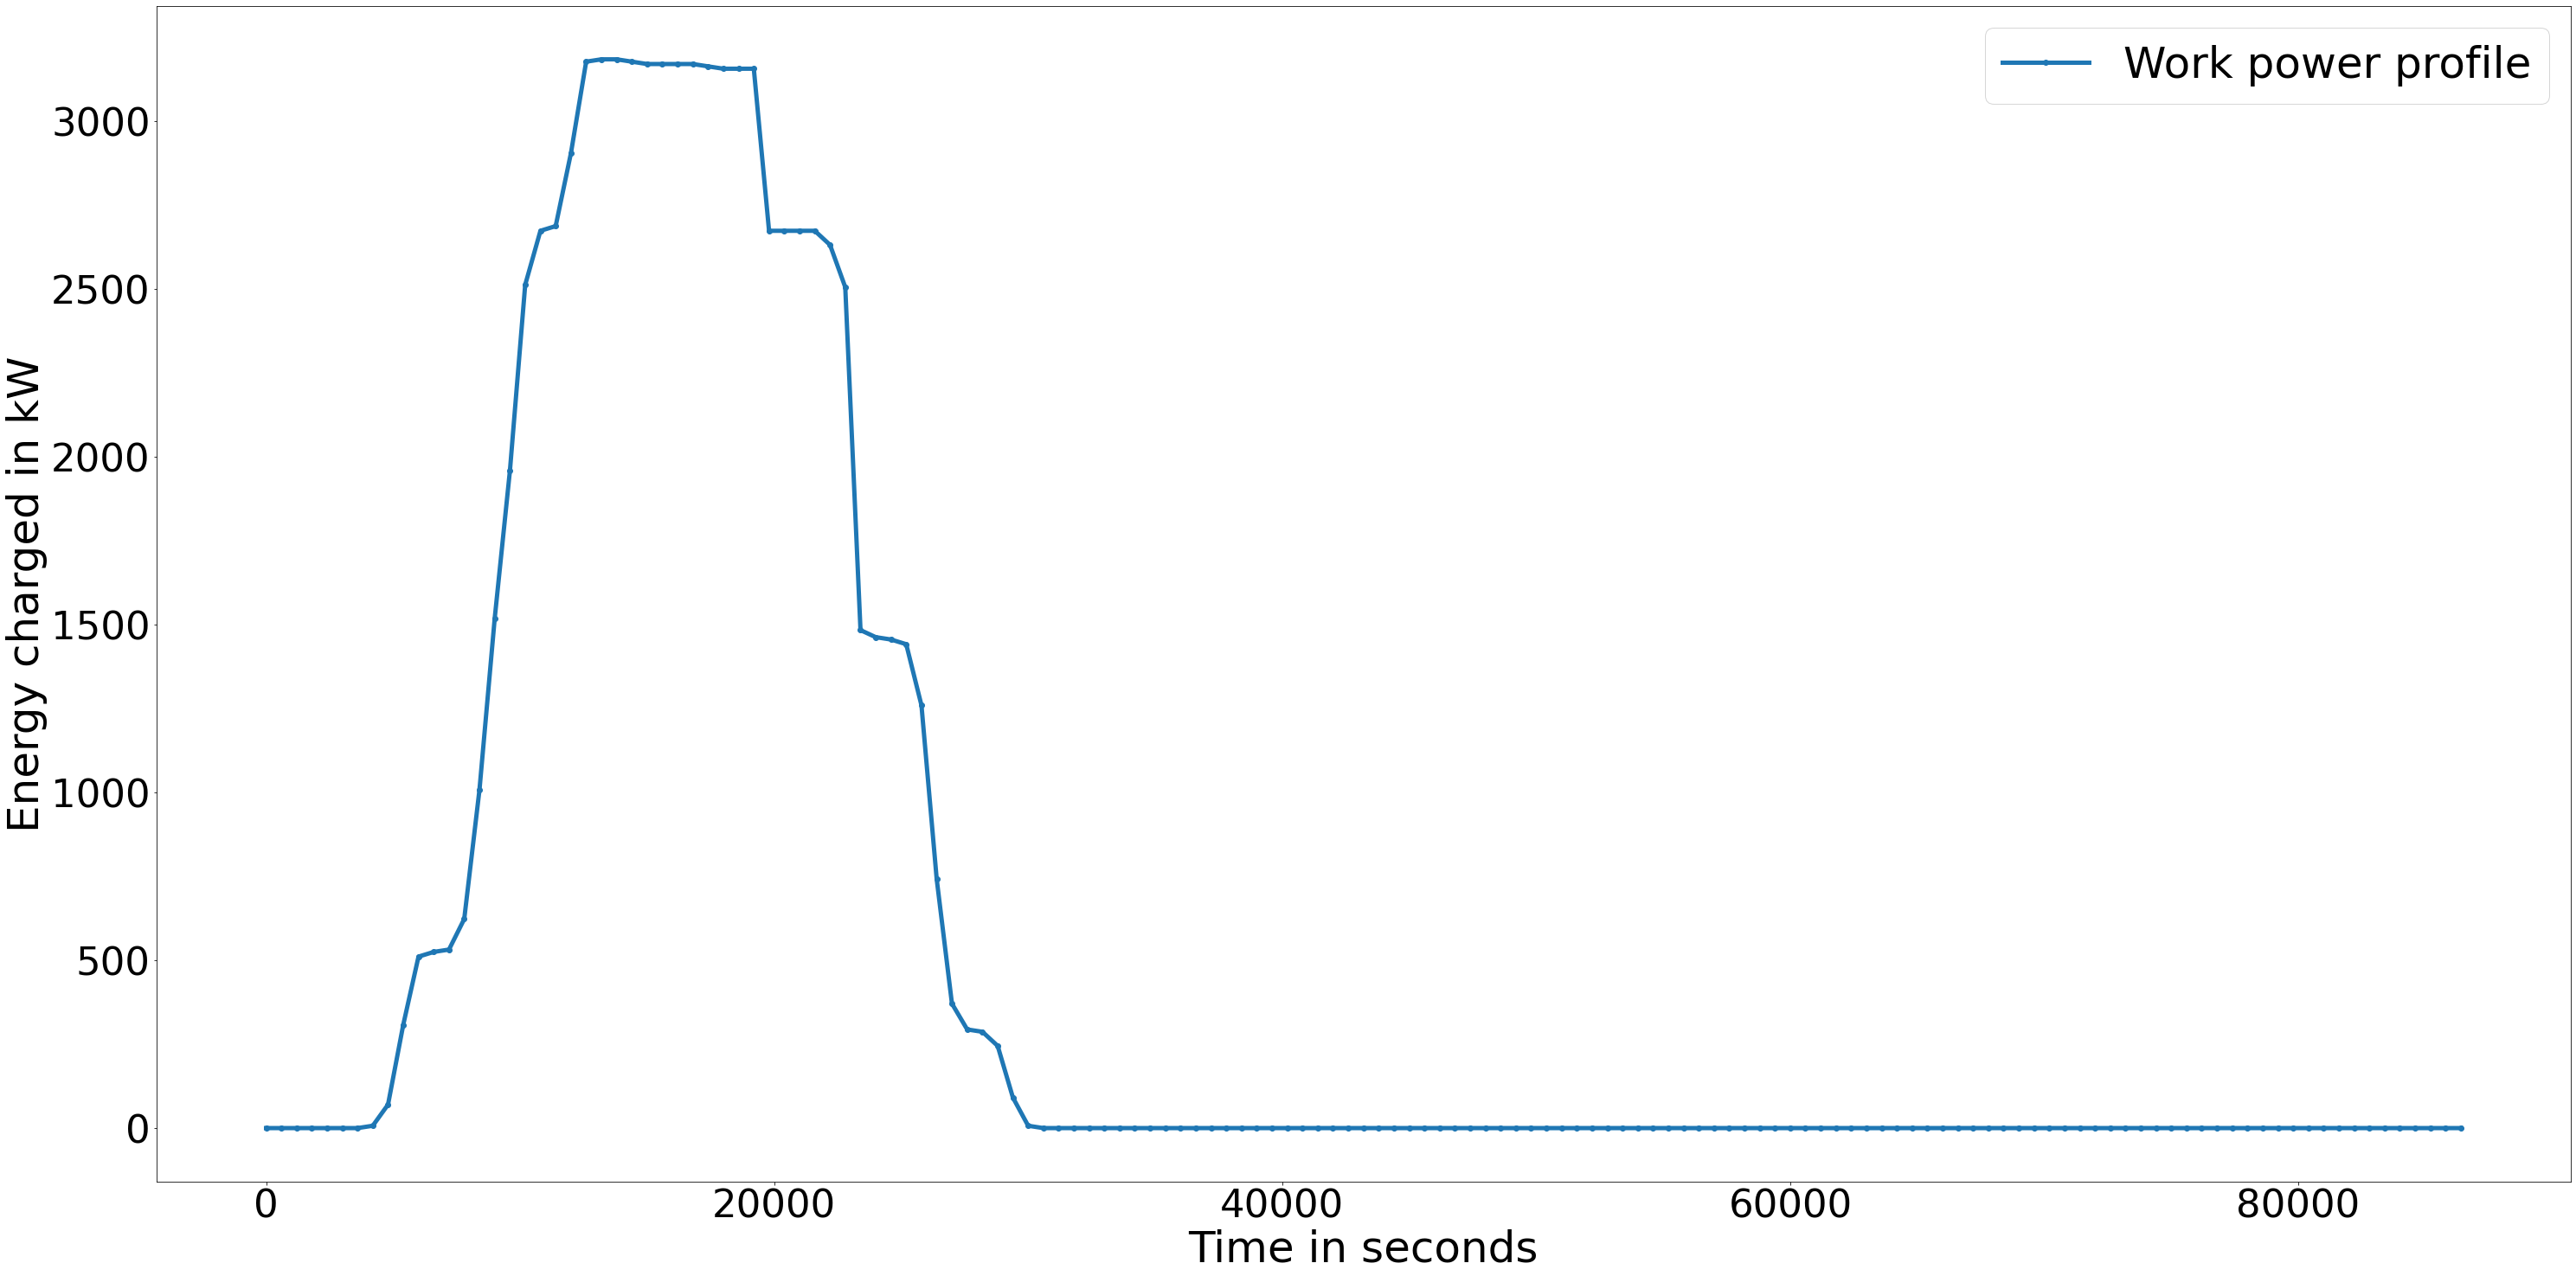

In [6]:
df_work.plot(x ='step', y='charging', kind = 'line', lw = 5, figsize=(50,25), fontsize=45, style='o-')
plt.legend(['Work power profile'], fontsize=50)
plt.xlabel('Time in seconds', fontsize=50)
plt.ylabel('Energy charged in kW', fontsize=50)
plt.show()

## Public

In [ ]:
# The same process as in profile_public
df = df_output
df_public = df.loc[df['charging_station'].str.contains("public")]
df_public2 = df.loc[df['status'] == "charging"]
df_public2 = df_public2.loc[df_public2['charging_station'].str.contains("public")]
df_public3 = df.loc[df['status'] == "not charging"]
df_public3 = df_public3.loc[df_public3['charging_station'].str.contains("public")]
df_public3 = df_public3.groupby(['step']).size().reset_index(name="count")
df_public2 = df_public2.groupby(['step']).size().reset_index(name="count")
df_public = df_public.groupby(['step']).size().reset_index(name="count")
df_public['charging'] = df_public['count'] - df_public3['count']
df_public['charging'] = df_public['charging'] * 22

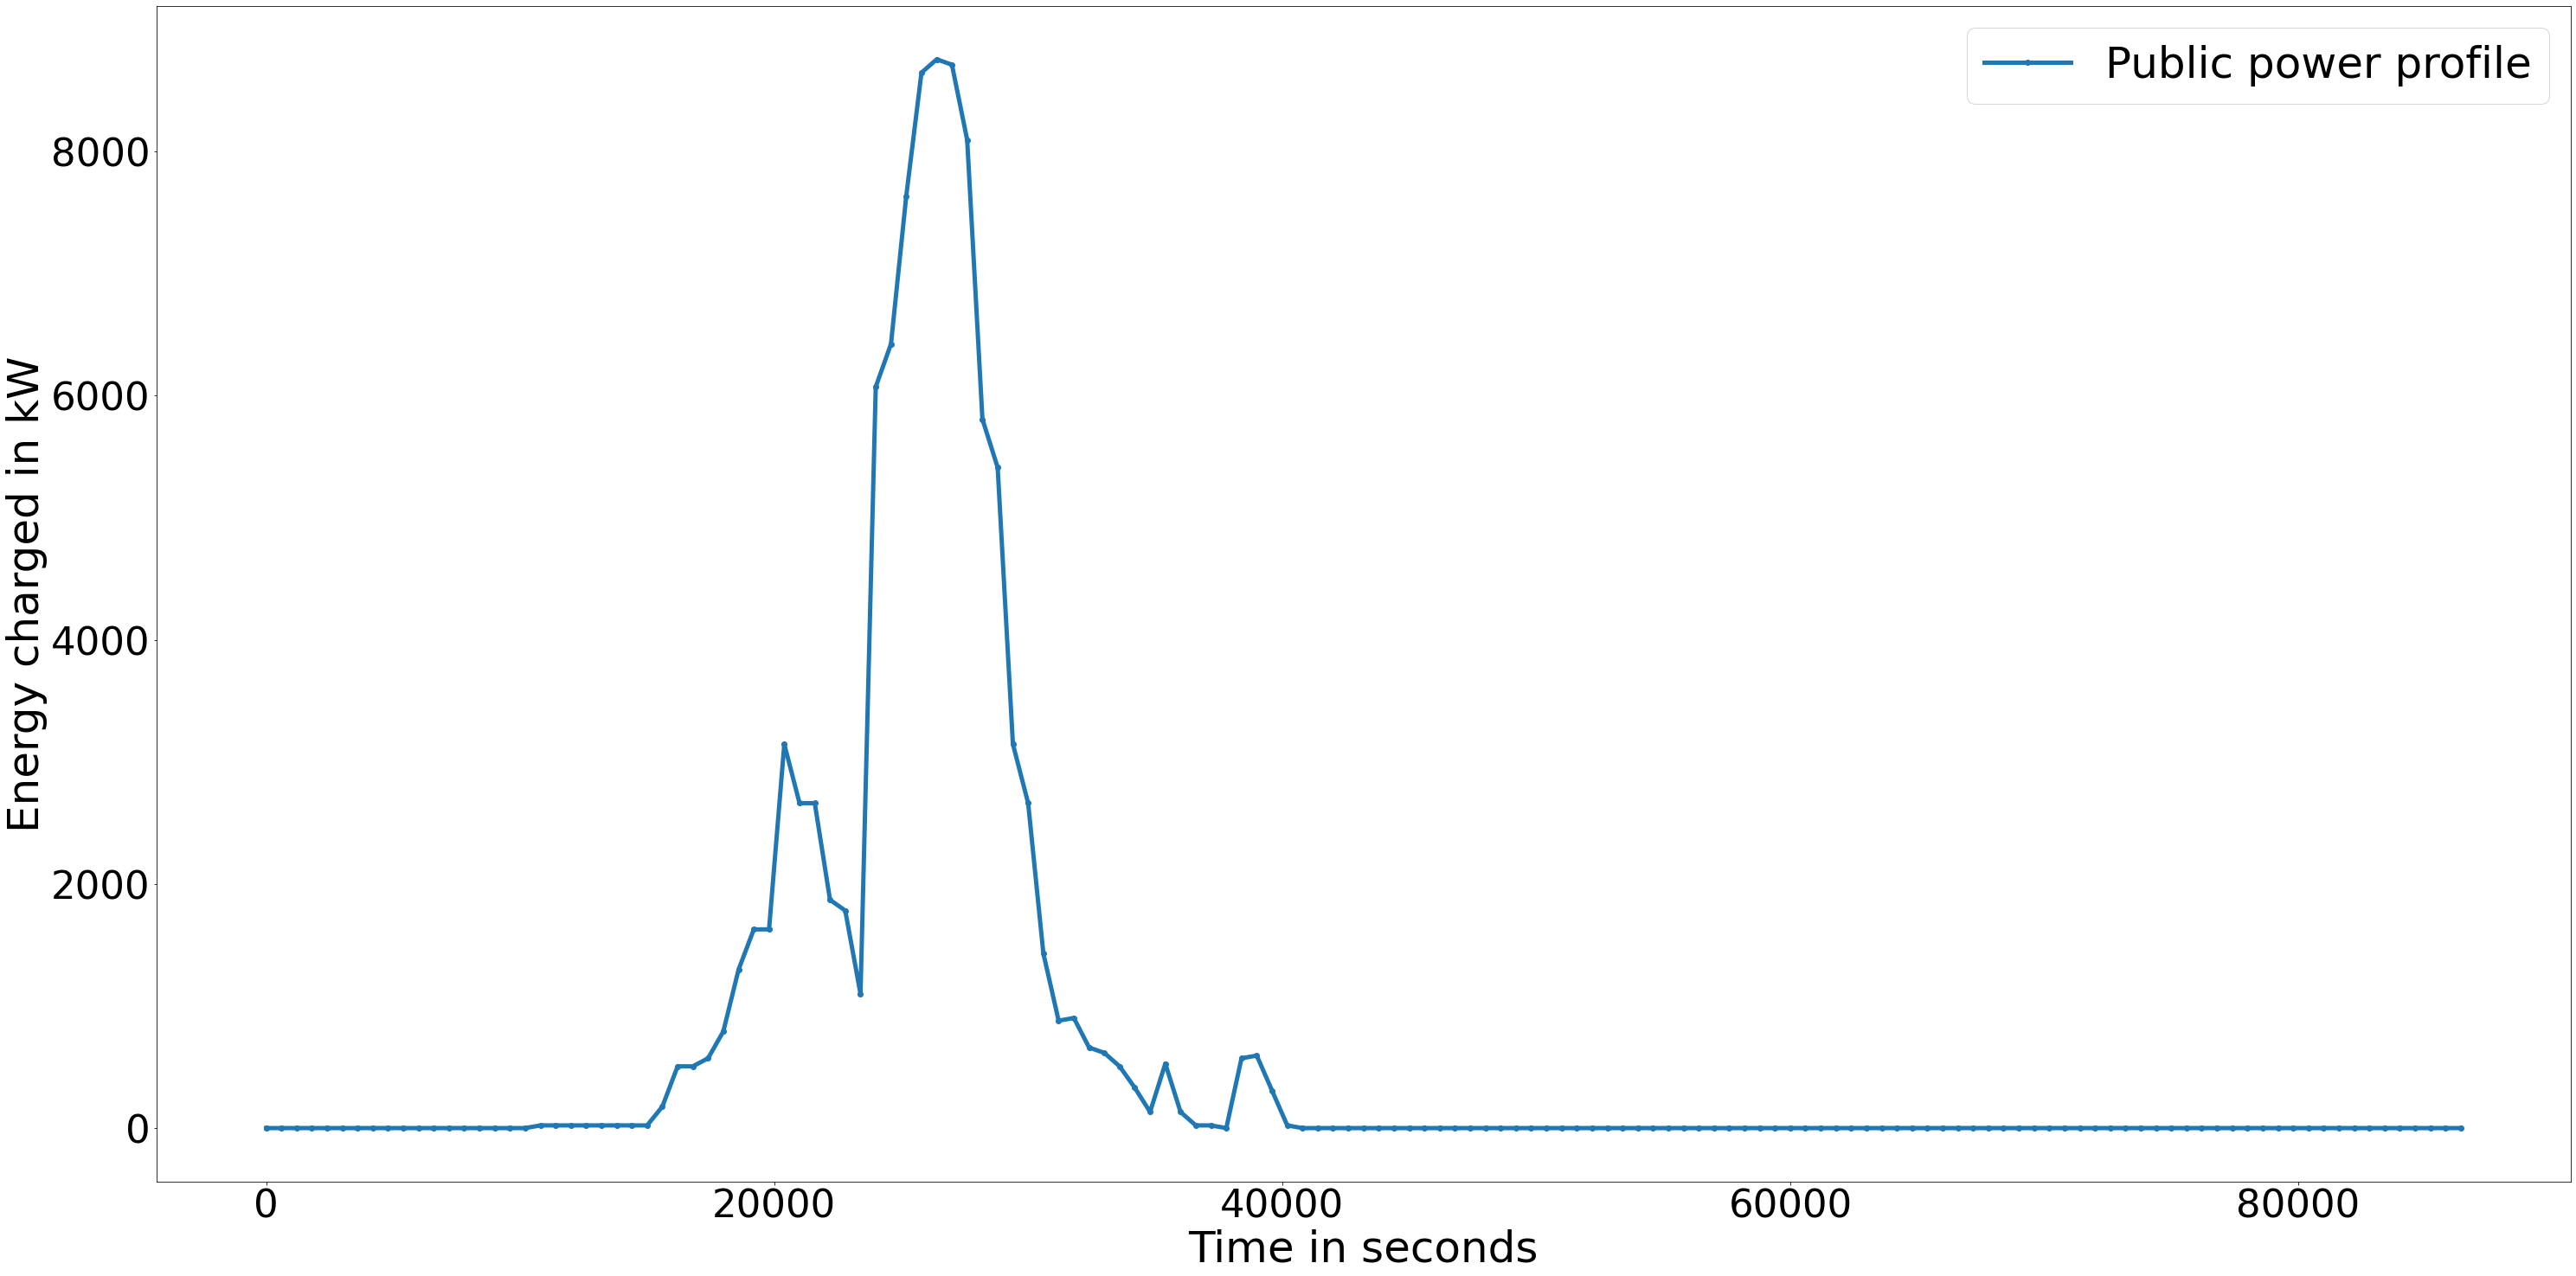

In [8]:
df_public.plot(x ='step', y='charging', kind = 'line', lw = 5, figsize=(50,25), fontsize=45, style='o-')
plt.legend(['Public power profile'], fontsize=50)
plt.xlabel('Time in seconds', fontsize=50)
plt.ylabel('Energy charged in kW', fontsize=50)
plt.show()

## Combine profiles

In [9]:
df_h = df_home
df_w = df_work
df_p = df_public

In [10]:
df_h = df_h.drop(df_h.columns[[1]], axis=1)
df_w = df_w.drop(df_w.columns[[1]], axis=1)
df_p = df_p.drop(df_p.columns[[1]], axis=1)

In [11]:
# Combine the three profiles into one
df_combined = pd.concat([df_h, df_w, df_p])
df_combined

,step,charging
0,0,0
1,600,0
2,1200,0
3,1800,0
4,2400,0
...,...,...
140,84000,0
141,84600,0
142,85200,0
143,85800,0


In [12]:
# Sort by steps and summarize
df_combined = df_combined.sort_values('step')
df_combined = df_combined.groupby('step').sum()

In [13]:
pd.set_option('display.max_rows', 145)
df_combined.head(145)

,charging
step,
0,0
600,0
1200,0
1800,0
2400,0
3000,0
3600,0
4200,7
4800,70


In [30]:
# Change time to hours
df_test = df_combined
df_test["step2"] = ["06:00","06:10","06:20","06:30","06:40","06:50","07:00","07:10","07:20","07:30","07:40","07:50","08:00","08:10","08:20","08:30","08:40","08:50","09:00","09:10","09:20","09:30","09:40","09:50","10:00","10:10","10:20","10:30","10:40","10:50","11:00","11:10","11:20","11:30","11:40","11:50","12:00","12:10","12:20","12:30","12:40","12:50","13:00","13:10","13:20","13:30","13:40","13:50","14:00","14:10","14:20","14:30","14:40","14:50","15:00","15:10","15:20","15:30","15:40","15:50","16:00","16:10","16:20","16:30","16:40","16:50","17:00","17:10","17:20","17:30","17:40","17:50","18:00","18:10","18:20","18:30","18:40","18:50","19:00","19:10","19:20","19:30","19:40","19:50","20:00","20:10","20:20","20:30","20:40","20:50","21:00","21:10","21:20","21:30","21:40","21:50","22:00","22:10","22:20","22:30","22:40","22:50","23:00","23:10","23:20","23:30","23:40","23:50","00:00","00:10","00:20","00:30","00:40","00:50","01:00","01:10","01:20","01:30","01:40","01:50","02:00","02:10","02:20","02:30","02:40","02:50","03:00","03:10","03:20","03:30","03:40","03:50","04:00","04:10","04:20","04:30","04:40","04:50","05:00","05:10","05:20","05:30","05:40","05:50","06:00"]
df_test

,charging,step,step2
step,,,
0,0,06:00,06:00
600,0,06:10,06:10
1200,0,06:20,06:20
1800,0,06:30,06:30
2400,0,06:40,06:40
3000,0,06:50,06:50
3600,0,07:00,07:00
4200,7,07:10,07:10
4800,70,07:20,07:20


In [32]:
# Sort by steps
df_test = df_test.sort_values('step2')
df_test

,charging,step,step2
step,,,
64800,0,00:00,00:00
65400,0,00:10,00:10
66000,0,00:20,00:20
66600,0,00:30,00:30
67200,0,00:40,00:40
67800,0,00:50,00:50
68400,0,01:00,01:00
69000,0,01:10,01:10
69600,0,01:20,01:20


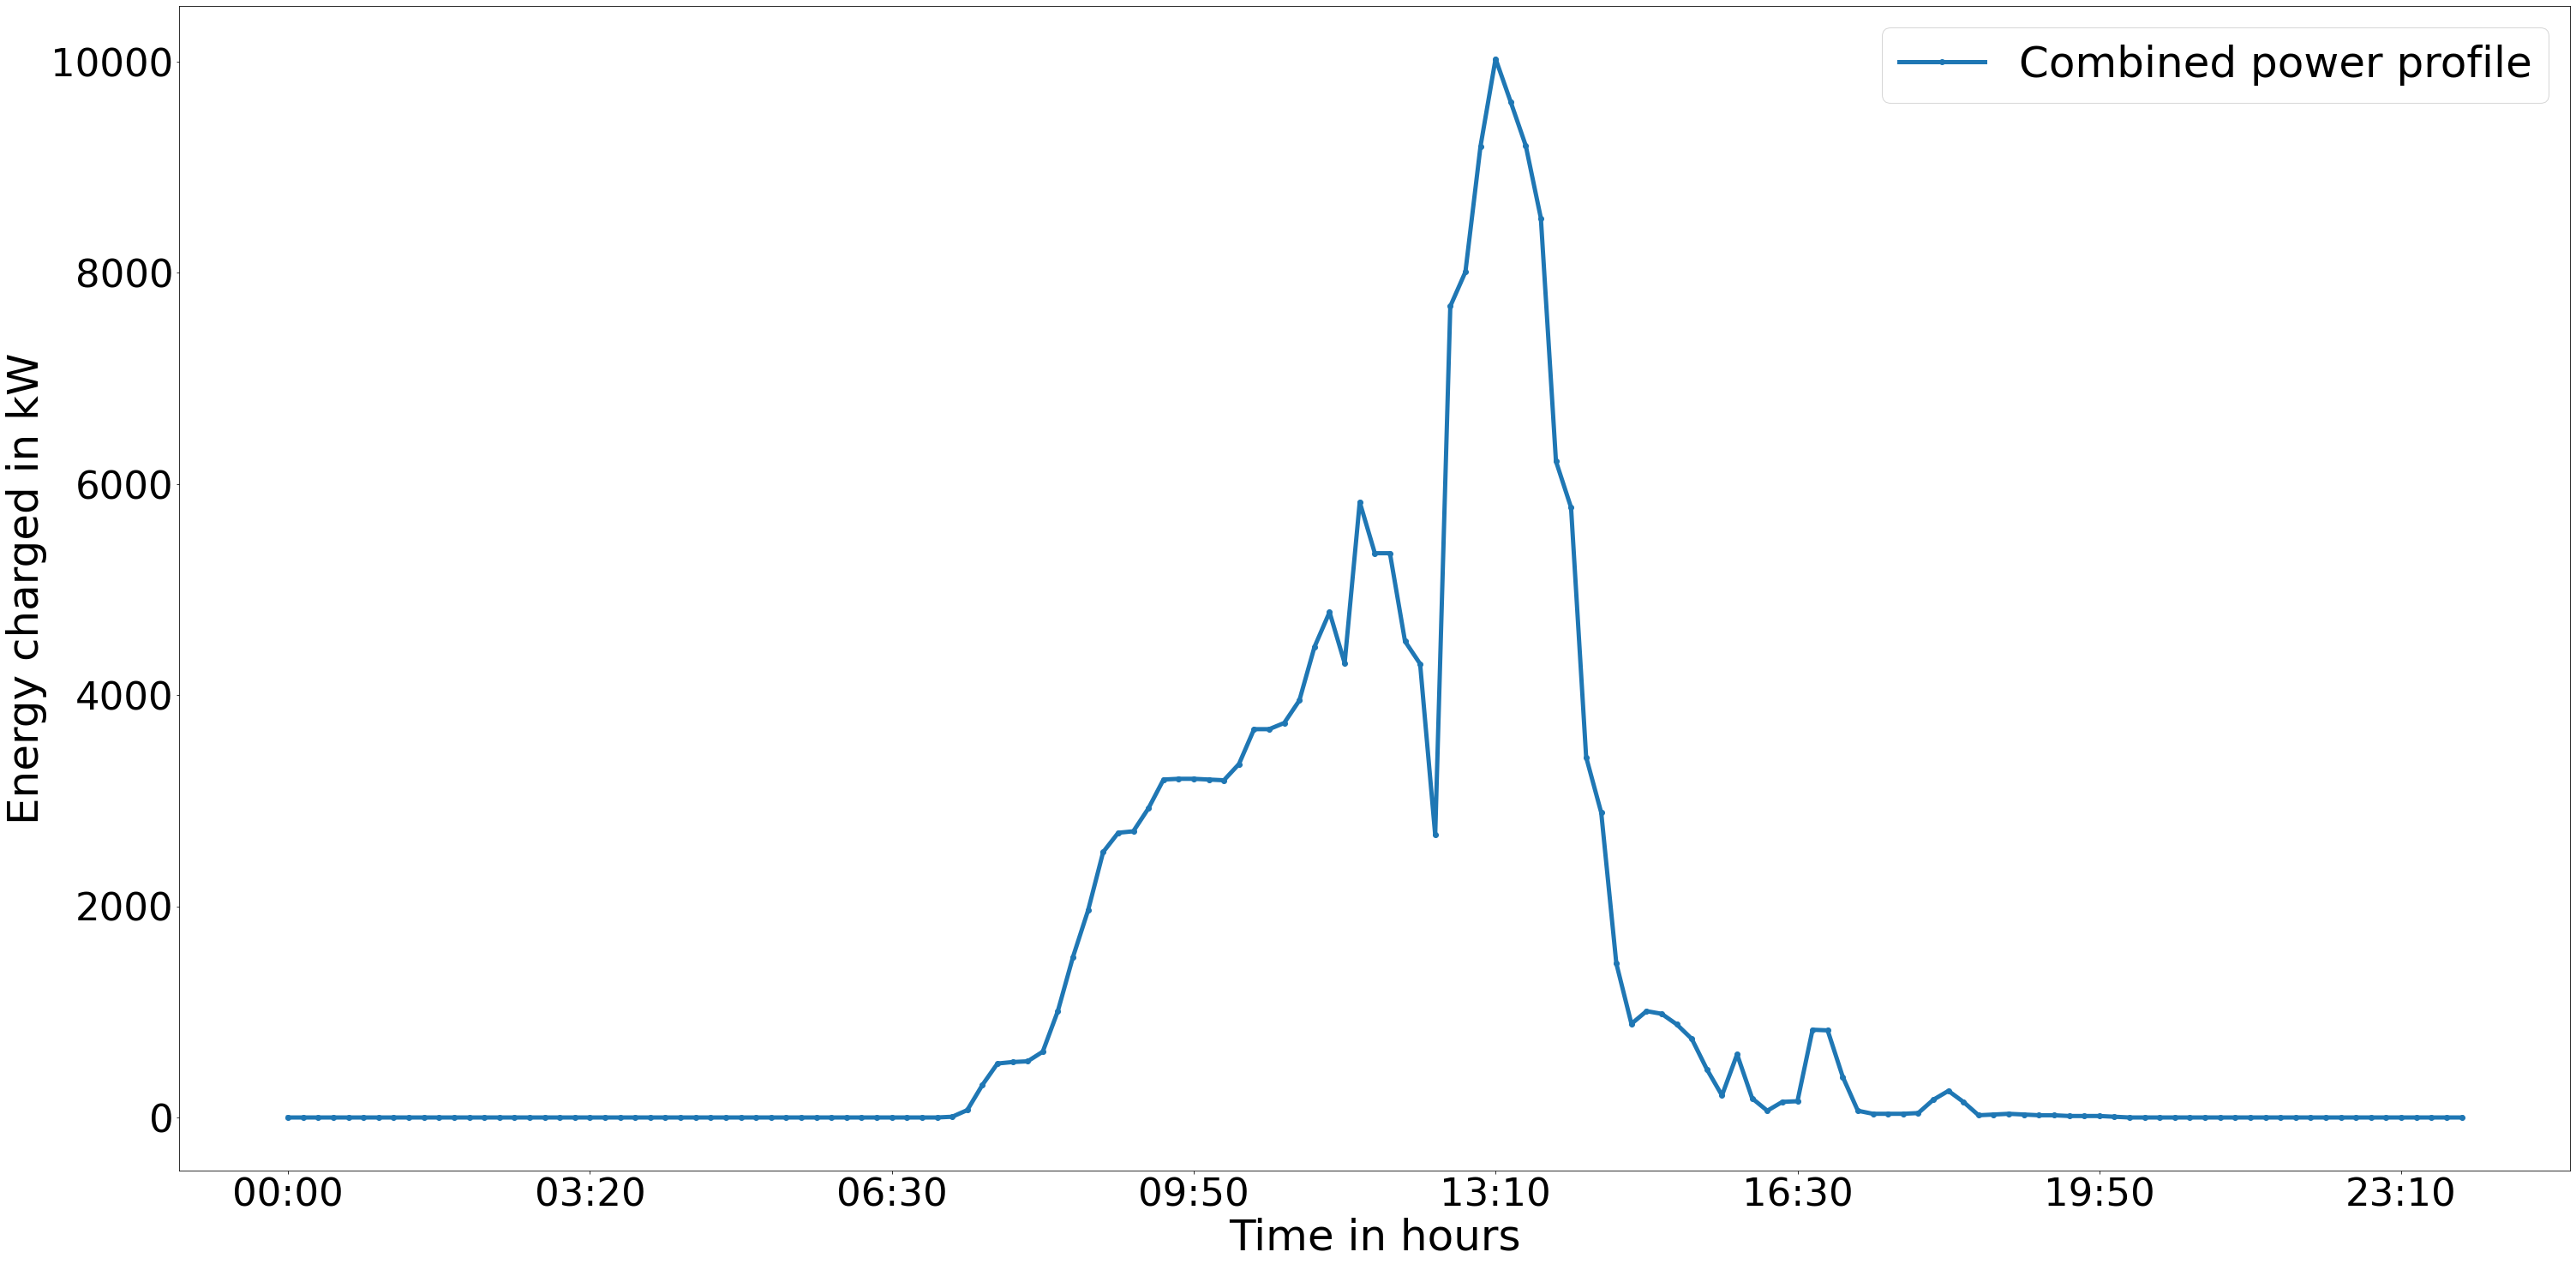

In [37]:
# Plot combined power profile
df_test.plot(x='step2', y='charging', kind = 'line', lw = 5, figsize=(50,25), fontsize=45, style='o-')
plt.legend(['Combined power profile'], fontsize=50)
plt.xlabel('Time in hours', fontsize=50)
plt.ylabel('Energy charged in kW', fontsize=50)
plt.show()

In [15]:
df_combined.describe()

,charging
count,145.000000
mean,1276.958621
std,2323.121200
min,0.000000
25%,0.000000
50%,21.000000
75%,1458.000000
max,10025.000000


In [16]:
total = df_combined['charging'].sum()
print(total) # Print total energy consumption

185159


## Plot individual profiles

In [17]:
# Change column names
df_h2 = df_h
df_h2['homecs'] = df_h2['charging']
df_h2 = df_h2.drop(df_h2.columns[[1]], axis=1)
df_h2

,step,homecs
0,0,0
1,600,0
2,1200,0
3,1800,0
4,2400,0
5,3000,0
6,3600,0
7,4200,0
8,4800,0
9,5400,0


In [18]:
df_w2 = df_w
df_w2['work'] = df_w2['charging']
df_w2 = df_w2.drop(df_w2.columns[[1]], axis=1)
df_w2

,step,work
0,0,0
1,600,0
2,1200,0
3,1800,0
4,2400,0
5,3000,0
6,3600,0
7,4200,7
8,4800,70
9,5400,308


In [22]:
df_p2 = df_p
df_p2['public'] = df_p2['charging']
df_p2 = df_p2.drop(df_p2.columns[[1,]], axis=1)
df_p2.head(59)

,step,public
0,0,0
1,600,0
2,1200,0
3,1800,0
4,2400,0
5,3000,0
6,3600,0
7,4200,0
8,4800,0
9,5400,0


In [23]:
# Combine profiles
df_all = pd.concat([df_h2, df_w2, df_p2])
df_all = df_all.sort_values('step')
df_all = df_all.fillna(0)
df_all = df_all.groupby('step').sum()
df_all

,homecs,work,public
step,,,
0,0.0,0.0,0.0
600,0.0,0.0,0.0
1200,0.0,0.0,0.0
1800,0.0,0.0,0.0
2400,0.0,0.0,0.0
3000,0.0,0.0,0.0
3600,0.0,0.0,0.0
4200,0.0,7.0,0.0
4800,0.0,70.0,0.0


In [38]:
# Change time to hours
df_test2 = df_all
df_test2["step2"] = ["06:00","06:10","06:20","06:30","06:40","06:50","07:00","07:10","07:20","07:30","07:40","07:50","08:00","08:10","08:20","08:30","08:40","08:50","09:00","09:10","09:20","09:30","09:40","09:50","10:00","10:10","10:20","10:30","10:40","10:50","11:00","11:10","11:20","11:30","11:40","11:50","12:00","12:10","12:20","12:30","12:40","12:50","13:00","13:10","13:20","13:30","13:40","13:50","14:00","14:10","14:20","14:30","14:40","14:50","15:00","15:10","15:20","15:30","15:40","15:50","16:00","16:10","16:20","16:30","16:40","16:50","17:00","17:10","17:20","17:30","17:40","17:50","18:00","18:10","18:20","18:30","18:40","18:50","19:00","19:10","19:20","19:30","19:40","19:50","20:00","20:10","20:20","20:30","20:40","20:50","21:00","21:10","21:20","21:30","21:40","21:50","22:00","22:10","22:20","22:30","22:40","22:50","23:00","23:10","23:20","23:30","23:40","23:50","00:00","00:10","00:20","00:30","00:40","00:50","01:00","01:10","01:20","01:30","01:40","01:50","02:00","02:10","02:20","02:30","02:40","02:50","03:00","03:10","03:20","03:30","03:40","03:50","04:00","04:10","04:20","04:30","04:40","04:50","05:00","05:10","05:20","05:30","05:40","05:50","06:00"]
df_test2.sort_values("step2")
df_test2

,homecs,work,public,step2
step,,,,
0,0.0,0.0,0.0,06:00
600,0.0,0.0,0.0,06:10
1200,0.0,0.0,0.0,06:20
1800,0.0,0.0,0.0,06:30
2400,0.0,0.0,0.0,06:40
3000,0.0,0.0,0.0,06:50
3600,0.0,0.0,0.0,07:00
4200,0.0,7.0,0.0,07:10
4800,0.0,70.0,0.0,07:20


In [39]:
# Sort by steps
df_test2 = df_test2.sort_values("step2")
df_test2

,homecs,work,public,step2
step,,,,
64800,0.0,0.0,0.0,00:00
65400,0.0,0.0,0.0,00:10
66000,0.0,0.0,0.0,00:20
66600,0.0,0.0,0.0,00:30
67200,0.0,0.0,0.0,00:40
67800,0.0,0.0,0.0,00:50
68400,0.0,0.0,0.0,01:00
69000,0.0,0.0,0.0,01:10
69600,0.0,0.0,0.0,01:20


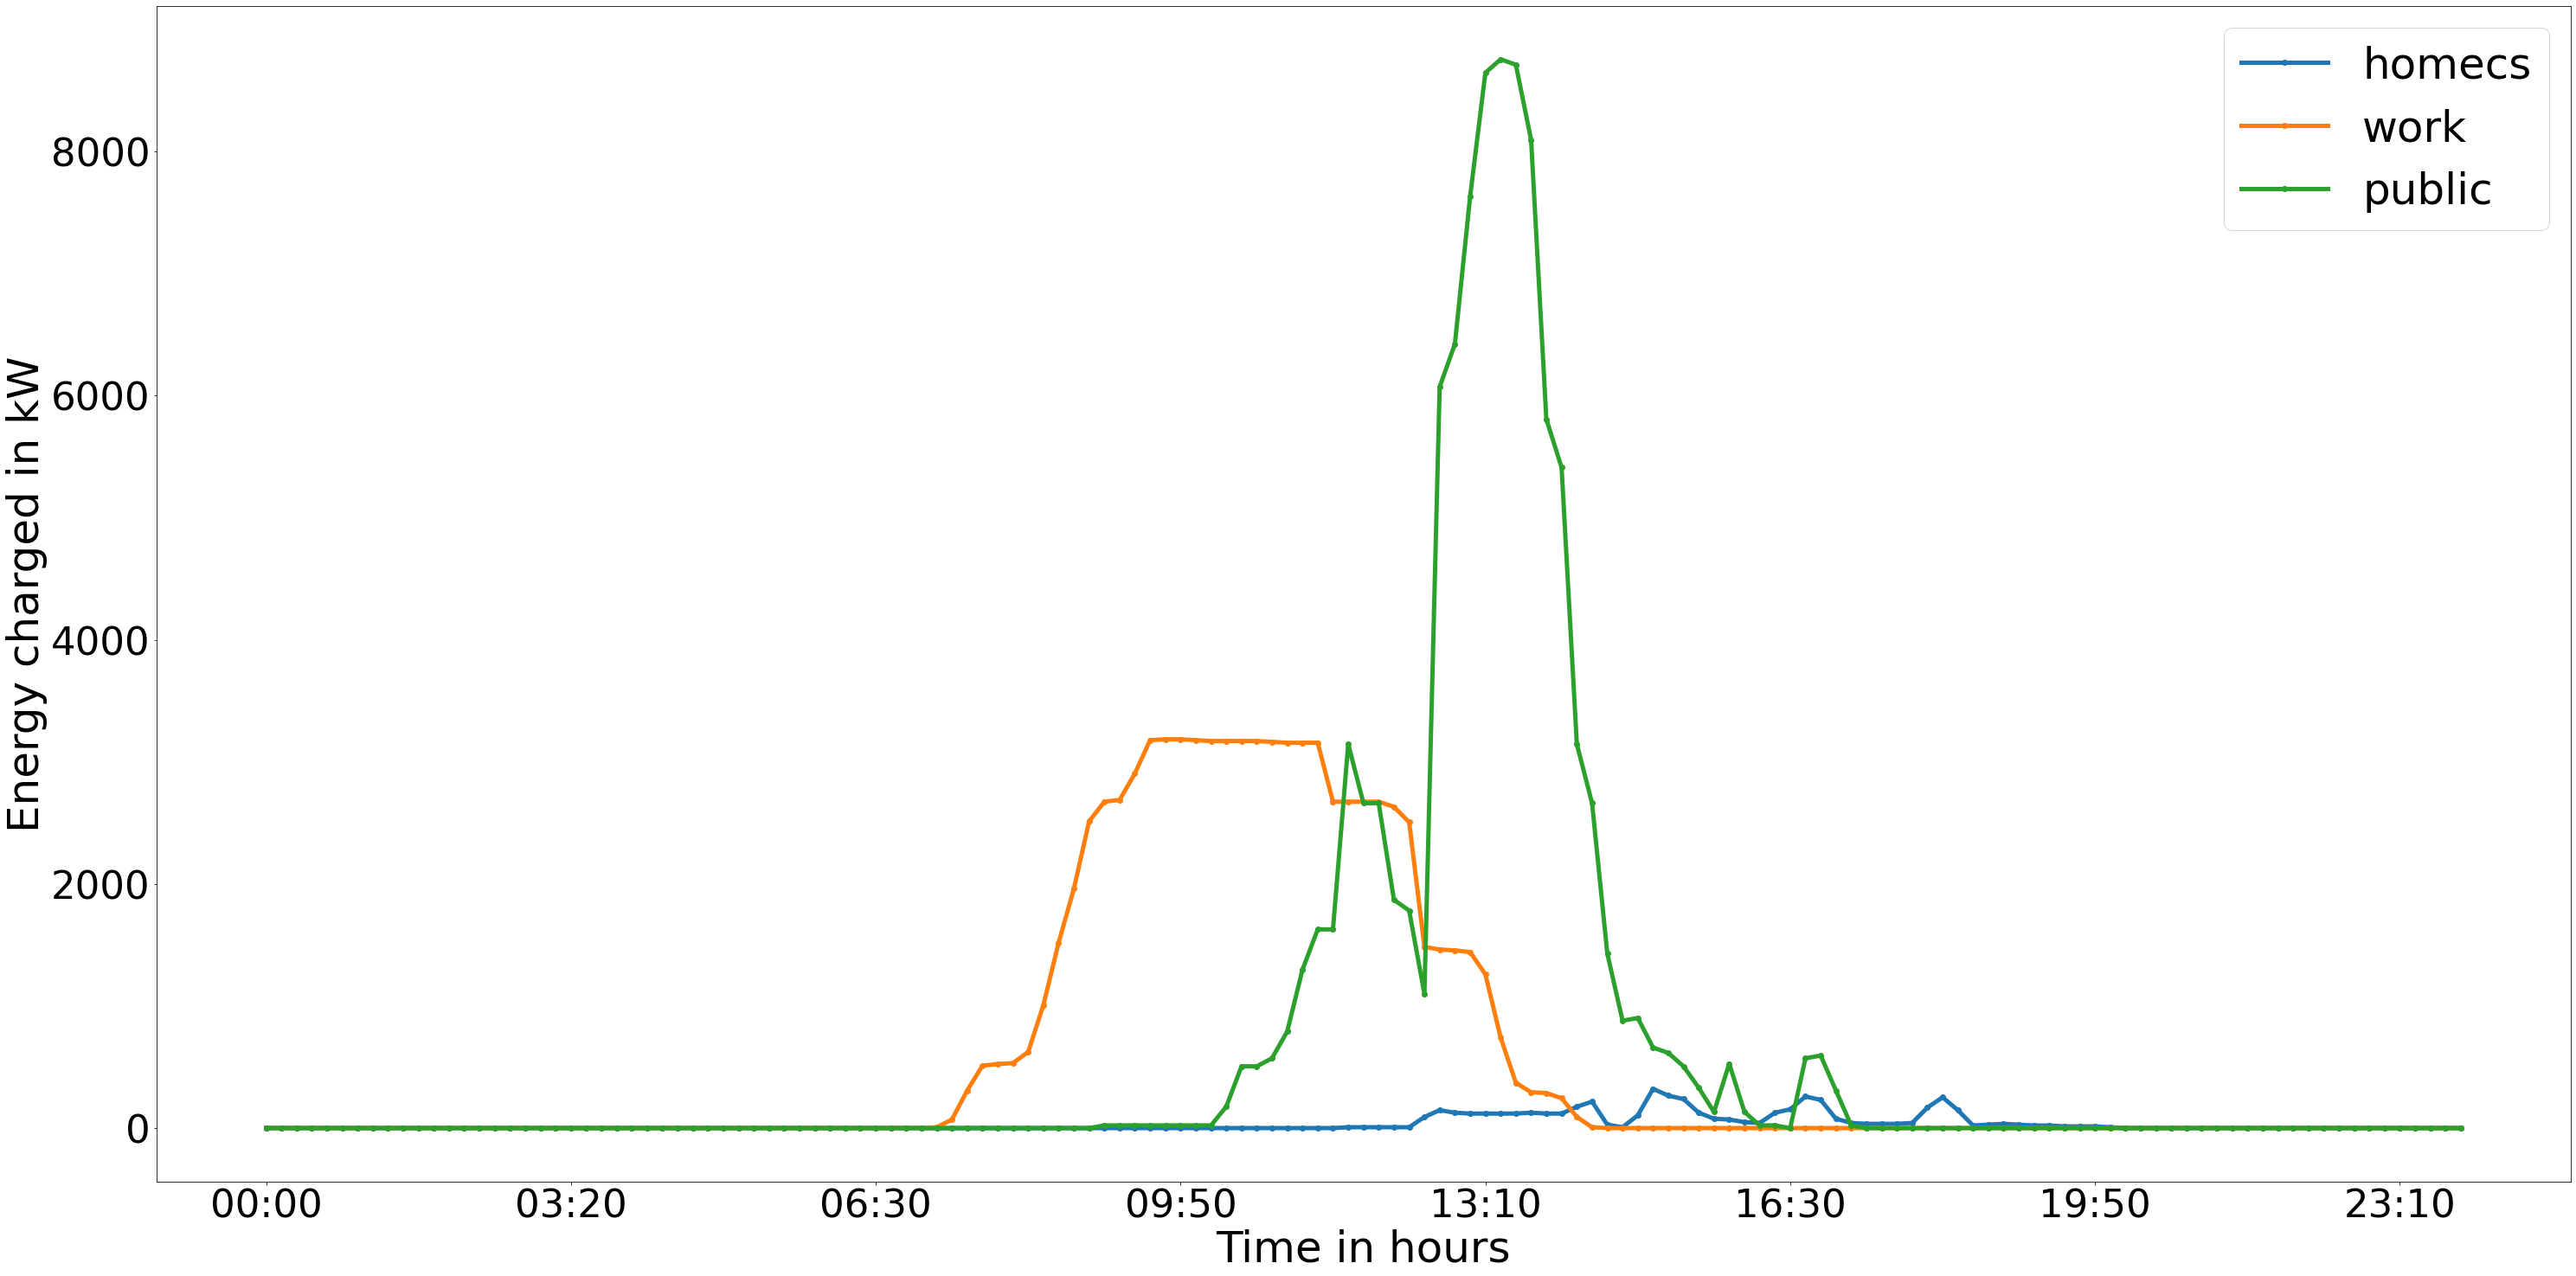

In [40]:
# Plot combined profiles with indvidual profiles
df_test2.plot(x='step2', kind = 'line', lw = 5, figsize=(50,25), fontsize=45, style='o-')
plt.legend(fontsize=50)
plt.xlabel('Time in hours', fontsize=50)
plt.ylabel('Energy charged in kW', fontsize=50)
#plt.axhline(y=86.67, color='r', linestyle='-')
plt.show()